In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

from tqdm import tqdm

import pandas as pd  # used for storing a tabular representation of the dataset, similar to XLS files.
from pathlib import Path # used to check if the saved model files and accessories.
import requests #used to request remote judge.csv evaluation 
from sklearn.preprocessing import StandardScaler  # used for normalization of dataset
from sklearn.preprocessing   import LabelBinarizer    # used for splitting the gender column
from sklearn.preprocessing   import MinMaxScaler      # used for normalization of dataset
from sklearn.model_selection import train_test_split  # used for performing the train-test split of a dataframe
import cv2                                            # OpenCV used for image processing
import random   #random number generator
import datetime #used to get current date/time
import math     #math/numerical functions
import os       #os specific functions, like file open/close etc.
import gc       #garbage collection module -- used to manually clean up memory spaces/references.

from sklearn.preprocessing import OneHotEncoder   #My favorite categorical to numerical feature conversion tool
from tensorflow import keras  # keras used for construction of the Artificial neural network
from keras.models import Model, Sequential #keras model architectures
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D #types of layers
from keras.losses import mean_squared_error, huber, log_cosh  #built-in loss 
from tensorflow.python.keras.saving import hdf5_format  #used for saving models 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard  #callbacks
from keras.models import model_from_json  #used for loading model architecture from json file
import h5py  #saved model type

import matplotlib.pyplot as plt  # used for training visualization
import numpy as np  # numpy arrays used for matrix computations

from keras.applications import xception
from keras import backend as K
from keras.utils import np_utils

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# File handling imports
import shutil

# Import libraries
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
from PIL import Image

In [65]:
files = [
    'male original uniform.csv', 
    'female original uniform.csv', 
    'male AOR uniform.csv', 
    'female AOR uniform.csv' 
]
labels = [
    'Male Subset Predictions of Uniform Distribution of Samples, Original Model',
    'Female Subset Predictions of Uniform Distribution of Samples, Original Model',
    'Male Subset Predictions of Uniform Distribution of Samples, AOR Model',
    'Female Subset Predictions of Uniform Distribution of Samples, AOR Model'
]
labels = [
    'Male Subset Predictions, Original Model',
    'Female Subset Predictions, Original Model',
    'Male Subset Predictions, AOR Model',
    'Female Subset Predictions, AOR Model'
]

In [66]:
def show_stats(file, label):
    
    label_list = ['0: Very Low', '1: Low', '2: High', '3: Very High']
    
    plt.subplots(figsize=(5, 3))
    
    filename = os.path.join('Uniform Stats', file)
    predictions = pd.read_csv(filename, header=None)
    results = []
    for col in [0,1,2,3]:
        series = predictions[col].values
        results.append(series)

    plt.boxplot(results)

    for idx, array in enumerate(results):
        value = np.mean(array)
        plt.text(idx+0.55, 0.9, 'Mean: ' + str(round(value, 2)))

    plt.xticks(ticks=[1,2,3,4], labels=label_list)
        
    plt.title(label)

    plt.ylim([0, 1])
    plt.xlabel('Engagement Level')
    plt.ylabel('Proportion of Predictions')

    plt.show()

Male Subset Predictions, Original Model


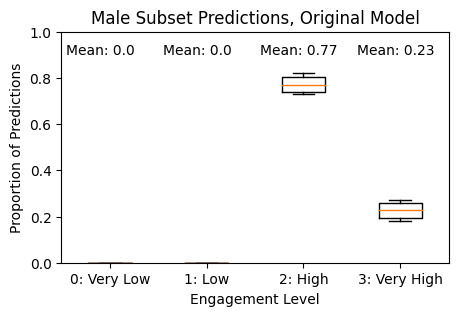

Female Subset Predictions, Original Model


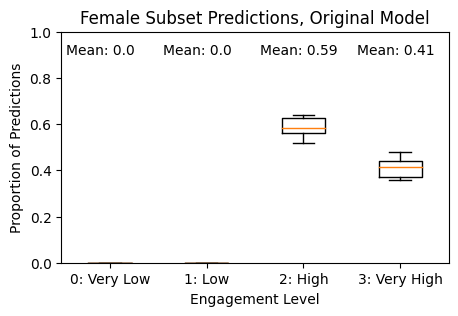

Male Subset Predictions, AOR Model


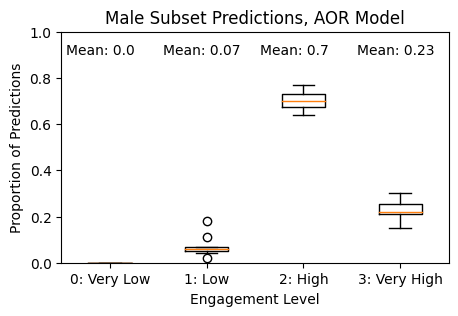

Female Subset Predictions, AOR Model


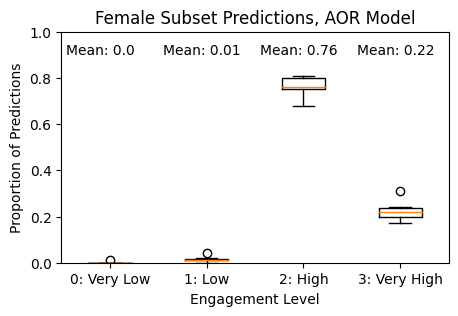

In [67]:
for file, label in zip(files, labels):
    print(label)
    show_stats(file, label)